In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gmplot import gmplot
# conda install git pip    (tal vez solo con pip...)
# pip install gmplot

In [2]:
wtdataset = pd.read_csv('../input/wtageinf.csv')
lndataset = pd.read_csv('../input/lenageinf.csv')

In [3]:
wtdataset[:5]

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878


/home/emanuel/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


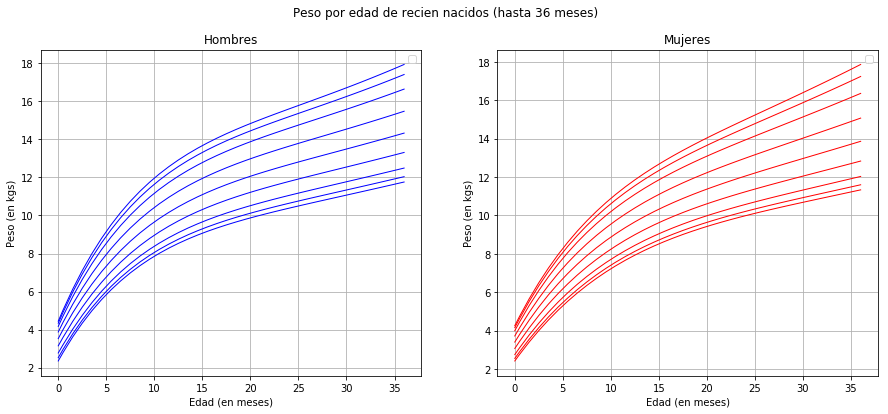

In [4]:
columns = list(set(wtdataset.columns) - set(['Sex', 'Agemos', 'S', 'L', 'M']))
f, ax = plt.subplots(ncols=2, sharey=False, figsize=(15,6))
f.suptitle('Peso por edad de recien nacidos (hasta 36 meses)')
ax1 = wtdataset[wtdataset.Sex == 1].plot.line(x='Agemos', y=columns, color='blue', linewidth=1, ax=ax[0])
ax1.grid(True)
ax1.set_title('Hombres')
ax1.set_ylabel('Peso (en kgs)')
ax1.set_xlabel('Edad (en meses)')
ax1.legend([])
ax2 = wtdataset[wtdataset.Sex == 2].plot.line(x='Agemos', y=columns, color='red', linewidth=1, ax=ax[1])
ax2.set_title('Mujeres')
ax2.set_ylabel('Peso (en kgs)')
ax2.set_xlabel('Edad (en meses)')
ax2.legend([])
ax2.grid(True)

In [5]:
# some cleaning
# row 37 contains a re asignment of columns...
# (this cell should be run only once!)
lndataset = lndataset.drop(37)
columns = ['P3', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P97', 'Agemos', 'Sex']
for col in columns:
    lndataset[col] = pd.to_numeric(lndataset[col])

/home/emanuel/miniconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


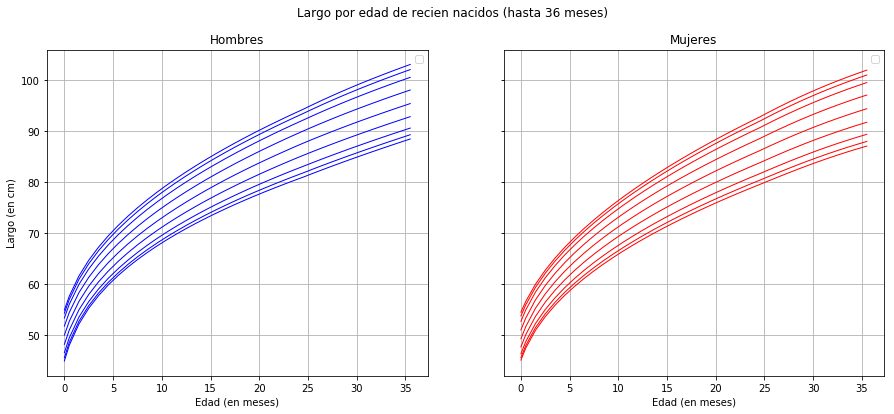

In [6]:
columns = ['P3', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P97']
f, ax = plt.subplots(ncols=2, sharey=True, figsize=(15,6))
f.suptitle('Largo por edad de recien nacidos (hasta 36 meses)')
ax1 = lndataset[lndataset.Sex == 1].plot.line(x='Agemos', y=columns, color='blue', linewidth=1, ax=ax[0])
ax1.grid(True)
ax1.set_title('Hombres')
ax1.set_ylabel('Largo (en cm)')
ax1.set_xlabel('Edad (en meses)')
ax1.legend([])
ax2 = lndataset[lndataset.Sex == 2].plot.line(x='Agemos', y=columns, color='red', linewidth=1, ax=ax[1])
ax2.set_title('Mujeres')
ax2.set_ylabel('Largo (en cm)')
ax2.set_xlabel('Edad (en meses)')
ax2.legend([])
ax2.grid(True)

#### This charts should look like these
Girls:

https://www.cdc.gov/growthcharts/data/set1clinical/cj41l018.pdf

Boys:

https://www.cdc.gov/growthcharts/data/set1clinical/cj41l017.pdf

In [7]:
from gmplot import gmplot

In [8]:
pfdataset = pd.read_json('../input/pasos.json')
pfdataset[:5]

,key,location,name
0,SAN SEBASTIAN ( USHUAIA ),"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA )
1,AERO PUBLICO DE USHUAIA,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA
2,PUERTO USHUAIA (PREFECTURA),"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA)
3,PUERTO USHUAIA,"[-54.8019121, -68.3029511]",PUERTO USHUAIA
4,PASO LAURITA CASAS VIEJAS,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS


In [9]:
lats, lons = zip(*list(pfdataset.location))

In [10]:
gmap = gmplot.GoogleMapPlotter(-38.5018234, -64.786923, 4)
for i in range(0,len(lats)):
    gmap.marker(lats[i], lons[i], color='green',title=pfdataset.name[i])
gmap.draw("pasos_fronterizos.html")